<a href="https://colab.research.google.com/github/srilasya1815/FMMLlab2024/blob/main/Module7_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

## Matrix Factorization (Based on Recommender System Example)

Matrix factorization is a way to generate latent features when multiplying two different kinds of entities. Collaborative filtering is the application of matrix factorization useful to identify the relationship between items’ and users’ entities in a recommender system.

Define a set of Users (U), items (D), R size of |U|, and |D|. The matrix |U|\*|D| includes all the ratings given by users. The goal is to discover K latent features. Given with the input of two matrics matrices P (|U|\*k) and Q (|D|\*k), it would generate the product result R.

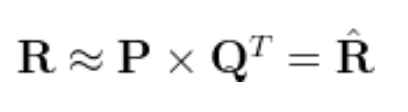

Matrix P represents the association between a user and the features while matrix Q represents the association between an item and the features. We can get the prediction of a rating of an item by the calculation of the dot product of the two vectors corresponding to u_i and d_j.

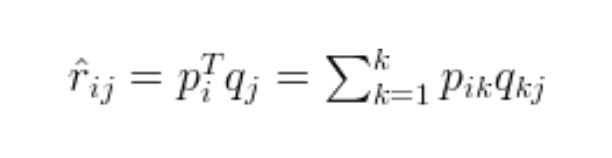

To get two entities of both P and Q, we need to initialize the two matrices and calculate the difference of the product named as matrix M. Next, we minimize the difference through the iterations. The method is called gradient descent, aiming at finding a local minimum of the difference.

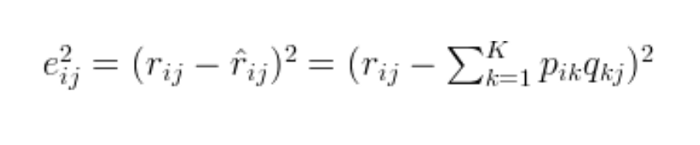

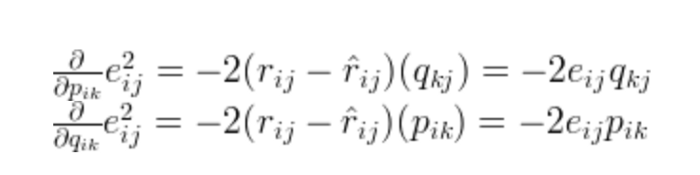

In [1]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:
            break

    return P, Q.T

In [2]:
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
     [2,1,3,0],
    ]

R = numpy.array(R)
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 3


P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)



nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

The predicted matrix is generated below. As you can see, the predicted matrix has similar output with the true values, and the 0 ratings are replaced with the prediction based on the similar users’ preferences on movies.

In [3]:
print(nR)

[[4.98611604 2.94769955 4.04955135 1.0063531 ]
 [3.96981436 1.53379356 3.64270091 1.00329053]
 [1.02346294 0.93470131 3.86149725 4.97609023]
 [0.98784954 1.07609529 3.12561747 3.98350488]
 [3.07377069 1.07016346 4.97539869 3.98140239]
 [1.99074882 1.01675576 2.98573712 2.39201813]]


## SVD (Continuing the Recommender System Example)

When it comes to dimensionality reduction, the Singular Value Decomposition (SVD) is a popular method in linear algebra for matrix factorization in machine learning. Such a method shrinks the space dimension from N-dimension to K-dimension (where K < N) and reduces the number of features. SVD constructs a matrix with the row of users and columns of items and the elements are given by the users’ ratings. Singular value decomposition decomposes a matrix into three other matrices and extracts the factors from the factorization of a high-level (user-item-rating) matrix.

The factorisation of this matrix is done by the singular value decomposition. It finds factors of matrices from the factorisation of a high-level (user-item-rating) matrix. The singular value decomposition is a method of decomposing a matrix into three other matrices as given below:

image.png

Where A is a m x n utility matrix, U is a m x r orthogonal left singular matrix, which represents the relationship between users and latent factors, S is a r x r diagonal matrix, which describes the strength of each latent factor and V is a r x n diagonal right singular matrix, which indicates the similarity between items and latent factors. The latent factors here are the characteristics of the items, for example, the genre of the music. The SVD decreases the dimension of the utility matrix A by extracting its latent factors. It maps each user and each item into a r-dimensional latent space. This mapping facilitates a clear representation of relationships between users and items.

## Working with Text 1 : Bag of Words Model

A problem with modeling text is that it is messy, and techniques like machine learning algorithms prefer well defined fixed-length inputs and outputs. Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

    A vocabulary of known words.
    A measure of the presence of known words.


Let's try BoW model on an example

The sentences are -

1.   grey is a dull color
2.   orange is a fruit
3.   orange is a colour


In [4]:
sentences = [["grey", "is", "a", "dull", "colour"], ["orange", "is", "a", "fruit"], ["orange", "is", "a", "colour"]]
# Add your sentences here and see the embeddings

# The vocabulary is -
# vocabulary = ["grey", "is", "a", "dull", "colour", "orange", "fruit"]

vocabulary = []
for sentence in sentences:
  for word in sentence:
    if word not in vocabulary:
      vocabulary.append(word)

print(vocabulary)

['grey', 'is', 'a', 'dull', 'colour', 'orange', 'fruit']


Now we need to find which words occur in a given sentence and hence assign each sentence a corresponding vector based upon multiple metrics.

This can be done in a few ways :
1. Boolean count of whether the word occurs in a sentence
2. Counts of each word that occurs in a sentence
3. Frequency of words out of all oher words in a sentence
4. TF-IDF (will be covered in next lab)

In [5]:
# We shall implement point 2 now

bow_sentences = []

for sentence in sentences:
  bow_representation = [0 for i in range(len(vocabulary))]
  for indx, word in enumerate(vocabulary):
    if word in sentence:
      bow_representation[indx]+=1
  bow_sentences.append(bow_representation)

In [6]:
print(bow_sentences)

[[1, 1, 1, 1, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1], [0, 1, 1, 0, 1, 1, 0]]


**You can now try to add your sentences and see how it works!**

## Working with Text 2 : LSI (Latent Semantic Indexing)

Now, we will introduce an indexing and retrieval method: the Latent Semantic Indexing (LSI). It uses a mathematical technique called singular value decomposition (SVD) to identify patterns in the relationships between the terms and concepts contained in a corpus (unstructured collection of documents).

Latent Semantic Indexing is a common technique in the NLP field. It is used to analyze relationships between a set of documents and the terms they contain in order to produce a set of concepts related to the documents and terms.

LSI is based on the distributional hypothesis which states that words that are close in meaning will occur in similar pieces of text. The starting point is the representation matrix $A$ of the distribution of the words within the set of documents. It is a $m * n$ matrix where $m$ is the number of unique words and $n$ is the corpus cardinality. The element $a_{ij}$ represents the frequency of the word $i$ in the document $j$.

Singular Value Decomposition (SVD) is consequently applied to the matrix A in order to reduce the dimensionality of the data.

The SVD computes the term and document vector spaces by approximating the single term-frequency matrix $A$ as follows:

$$
A \approx TSD^T
$$

where $T$ is the $m * r$ term-concept vector matrix, $S$ is the $r * r$ singular values matrix, $D$ is the $n * r$ concept-document vector matrix, such that

$$
T^{T}T = I_r \\
D^{T}D = I_r \\
S_{11}\ge S_{22}\ge ... \ge S_{rr} \ge 0 \\ S_{ij}=0 \hspace{1cm} \forall i \ne j
$$

The next step is to truncate the SVD and keep only the largest $k$ << $r$ diagonal entries in the singular value matrix $S$, where $k$ is typically on the order 100 to 300 dimensions. This effectively reduces the term matrix $T$ size to $m * k$ and the document matrix $D$ size to $n * k$.

Let us now get started with the code! Note that we will use a library **gensim**, which does most of the hard work for us.

In [7]:
# Install requires lirbaries

!pip install --upgrade gensim
import pandas as pd
import gensim
from gensim.parsing.preprocessing import preprocess_documents

In [8]:
# !curl -L -o 'movies.csv' 'https://drive.google.com/uc?export=download&id=1F9l2PUvLtmd75_VFrqNnH-x_AR7zIhQW'

!curl -L -o 'wiki_movies_plots_deduped.csv' 'https://drive.usercontent.google.com/u/0/uc?id=12k4ltUwdhg525XW4dT6hgW18t_Fil3Hj&export=download'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 77.4M  100 77.4M    0     0  4837k      0  0:00:16  0:00:16 --:--:-- 20.0M


In [9]:
df = pd.read_csv('wiki_movies_plots_deduped.csv', sep=',', usecols = ['Release Year', 'Title', 'Plot'])
df = df[df['Release Year'] >= 2000] # Use a subset of the data
text_corpus = df['Plot'].values # Get the movie plots

In [10]:
print(text_corpus)

["After three years in prison, Cruella de Vil has been cured of her desire for fur coats by Dr. Pavlov and is released into the custody of the probation office on the provision that she will be forced to pay the remainder of her fortune (eight million pounds) to all the dog shelters in the borough of Westminster should she repeat her crime. Cruella therefore mends her working relationship with her valet Alonzo and has him lock away all her fur coats. Cruella's probation officer, Chloe Simon, nevertheless suspects her, partly because Chloe is the owner of the now-adult Dipstick (one of the original 15 puppies from the previous film) who moved from Roger and Anita's house to her house.\r\nDipstick's mate, Dottie, has recently given birth to three puppies: Domino, Little Dipper and Oddball (who lacks spots). To mend her reputation, Cruella buys the Second Chance Dog shelter, owned by Kevin Shepherd, to resolve its financial insolvency that is on the verge of eviction. Meanwhile, Dr. Pavlo

In [11]:
processed_corpus = preprocess_documents(text_corpus) # Preprocess the text
dictionary = gensim.corpora.Dictionary(processed_corpus)
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus] # Find the BoW representations

In [12]:
tfidf = gensim.models.TfidfModel(bow_corpus, smartirs='npu') # Perform TF-IDF to get the matrix
corpus_tfidf = tfidf[bow_corpus]

In [13]:
lsi = gensim.models.LsiModel(corpus_tfidf, num_topics=1000) # Perform LSI
index = gensim.similarities.MatrixSimilarity(lsi[corpus_tfidf])

In [14]:
new_doc = "In the arcade at night the video game characters leave their games. The protagonist is a girl from a candy racing game who glitches"
# new_doc = "Boy studies ballet in secret. His father wants him to go to the gym and boxe. They raise money for audition in London"

new_doc = gensim.parsing.preprocessing.preprocess_string(new_doc)
new_vec = dictionary.doc2bow(new_doc)
vec_bow_tfidf = tfidf[new_vec]
vec_lsi = lsi[vec_bow_tfidf]
sims = index[vec_lsi]
for s in sorted(enumerate(sims), key=lambda item: -item[1])[:10]:
    print(f"{df['Title'].iloc[s[0]]} : {str(s[1])}")

Candlestick : 0.77734804
Overlord: The Undead King : 0.77574205
Overlord: The Dark Warrior : 0.77574205
Wreck-It Ralph : 0.6918182
Kami-sama no Iu Toori : 0.666713
Inferno : 0.6664963
Sex Competition : 0.64280915
Glory Road : 0.59796864
 Facing the Giants : 0.5934867
Sleuth : 0.55034137


As you can see we give the description of the movie "Wreck-it Ralph" and it appears as the third recommended. We are doing a great job with LSI!

Feel free to change the description and see what movies you get :)

## Points to think about


1. How exactly does matrix factorization help us in the recommendation procedure? Why can we not simply model the user-movie matrix?


**How Matrix Factorization Helps**

Matrix factorization is a technique to decompose a large, sparse user-item interaction matrix (like a user-movie rating matrix) into two smaller, denser matrices. These smaller matrices represent:

   1. **User Matrix (P)**: Captures latent features or preferences for each user. For example, a user might have a high affinity for action movies, comedies, or movies with certain actors.
   2. **Item Matrix (Q)**: Captures latent features for each item (movie). For example, a movie might have features related to its genre, director, or actors.

The key is that the product of these two matrices approximates the original user-item matrix. This means that:

   *  We can predict the rating a user might give to an item they haven't seen by multiplying the corresponding row in the user matrix (representing the user's preferences) with the corresponding column in the item matrix (representing the item's features).
   *  The factorization process automatically learns these latent features, which often represent underlying patterns and preferences that are difficult to identify manually.

**Why Not Model the User-Movie Matrix Directly**?

Directly modeling the user-movie matrix is often impractical due to:

   1. **Sparsity**: The user-movie matrix is typically very sparse. Most users have only rated a small fraction of the available movies, resulting in a matrix with many missing values. This makes it difficult to learn reliable patterns.
   2. **Scalability**: For large datasets with millions of users and items, the user-movie matrix can become extremely large and difficult to store and process efficiently.

**Advantages of Matrix Factorization**:

   *  **Handles Sparsity**: By learning latent features, matrix factorization can make predictions for unseen items, even if the user-movie matrix has many missing values.
   *  **Reduces Dimensionality**: The smaller, denser matrices are easier to store and process than the original large matrix.
   *  **Reveals Hidden Patterns**: The latent features often represent underlying user and item characteristics that drive preferences and recommendations.

In essence, matrix factorization provides a compact and efficient way to represent user-item interactions, allowing recommendation systems to make accurate predictions and personalize recommendations even with limited data.

2. What do the rows of the matrix $T$ represent? (Definition of $T$ is above in the introduction to LSI).

In LSI, the matrix T is obtained through Singular Value Decomposition (SVD) of the term-document matrix. The SVD process decomposes the term-document matrix into three matrices: U, S, and V.
**The matrix T is typically defined as the product of U and S**.

Therefore, the rows of matrix T represent the documents in a reduced dimensional space. Each row in T corresponds to a document, but instead of being represented by raw term frequencies, it's represented by a combination of latent semantic concepts or topics. These concepts are derived from the SVD process and capture the underlying relationships between terms and documents.

In simpler terms:

   *  **Original term-document matrix**: Rows represent terms, columns represent documents.
   *  **Matrix T in LSI**: Rows represent documents, columns represent latent semantic concepts.

The values in each row of T indicate the strength of association between a document and each latent concept. This reduced-dimensional representation is used for document comparison and information retrieval in LSI.


## Resources and References

1. https://medium.com/betacom/latent-semantic-indexing-in-python-85880414b4de
2. https://www.analyticssteps.com/blogs/introduction-latent-semantic-analysis-lsa-and-latent-dirichlet-allocation-lda
3. https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b
4. https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/
5. https://machinelearningmastery.com/gentle-introduction-bag-words-model/

# Exercise
* Try out different modes of bag of words
* Experiment with different plots from the sheet and check the scores


In [15]:
#Try out different modes of bag of words
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the corpus
vectorizer.fit(corpus)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Transform the corpus into a document-term matrix
X = vectorizer.transform(corpus)


# Print the document-term matrix
print(X.toarray())

# Try different modes of bag of words

# 1. Binary mode
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus)
print("Binary mode:")
print(X.toarray())

# 2. TF-IDF mode
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print("\nTF-IDF mode:")
print(X.toarray())

# 3. N-grams mode
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Consider unigrams and bigrams
X = vectorizer.fit_transform(corpus)
print("\nN-grams mode (unigrams and bigrams):")
print(X.toarray())

# 4. Custom vocabulary
vocabulary = ['this', 'is', 'the', 'first', 'second', 'third']
vectorizer = CountVectorizer(vocabulary=vocabulary)
X = vectorizer.fit_transform(corpus)
print("\nCustom vocabulary mode:")
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Binary mode:
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]

TF-IDF mode:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]

N-grams mode (unigrams and bigrams):
[[0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 2 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0]
 [0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1]]

Custom vocabulary mode:
[[1 1 1 1 0 0]
 [1 1 1 0 1 0]
 [1 1 1 0 0 1]
 [1 1 1 1 0 0]]


1. **Purpose**: The code demonstrates how to create a Bag-of-Words (BoW) representation of text data using Python's scikit-learn library. This is a crucial step in Natural Language Processing (NLP) to convert text into a numerical format that machine learning models can understand.

2. **Core Components**:

    CountVectorizer: This class is used to create a BoW representation based on word counts.
    TfidfVectorizer: This class is used to create a BoW representation using TF-IDF weighting (Term Frequency-Inverse Document Frequency). TF-IDF considers the importance of words based on their frequency within a document and their rarity across the entire corpus.

3. **Workflow**:
    * Create a Corpus: A list of text documents is defined as the corpus.
    * Create a Vectorizer: An instance of either CountVectorizer or TfidfVectorizer is created.
    * Fit the Vectorizer: The vectorizer is fitted to the corpus to learn the vocabulary (the unique words in the corpus).
     Transform the Corpus: The corpus is transformed into a document-term matrix. Each row represents a document, and each column represents a word in the vocabulary. The values in the matrix represent the frequency (or TF-IDF score) of each word in each document.

4. **Modes of BoW:**

   *  **Binary Mode**: Using binary=True in CountVectorizer creates a binary representation. Each word is either present (1) or absent (0) in a document.

   *  **TF-IDF Mode**: Using TfidfVectorizer creates a representation that weights words based on their importance.

   *  **N-grams Mode**: Using ngram_range=(1, 2) in CountVectorizer includes both single words (unigrams) and two-word sequences (bigrams) in the vocabulary, capturing more context.

   *  **Custom Vocabulary Mode**: You can provide a specific list of words to CountVectorizer using the vocabulary parameter, limiting the representation to those words.

 5.  **Output**: The code prints the document-term matrix in each mode, showing the numerical representation of the text data. This matrix can then be used as input to machine learning models for tasks like text classification, sentiment analysis, or topic modeling

   

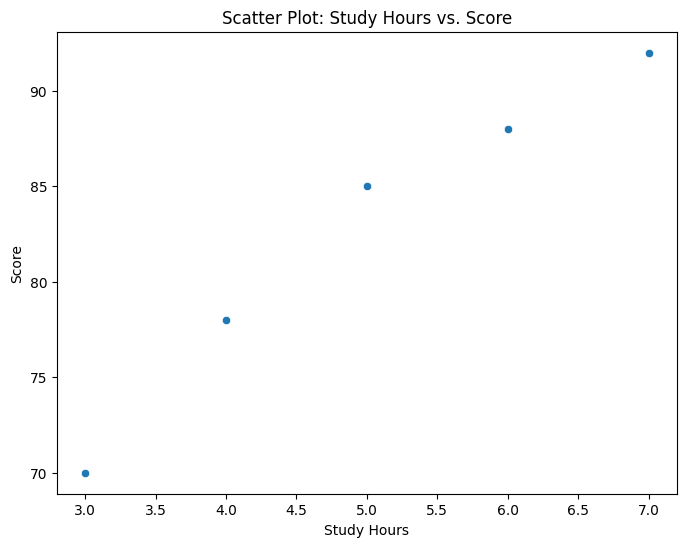

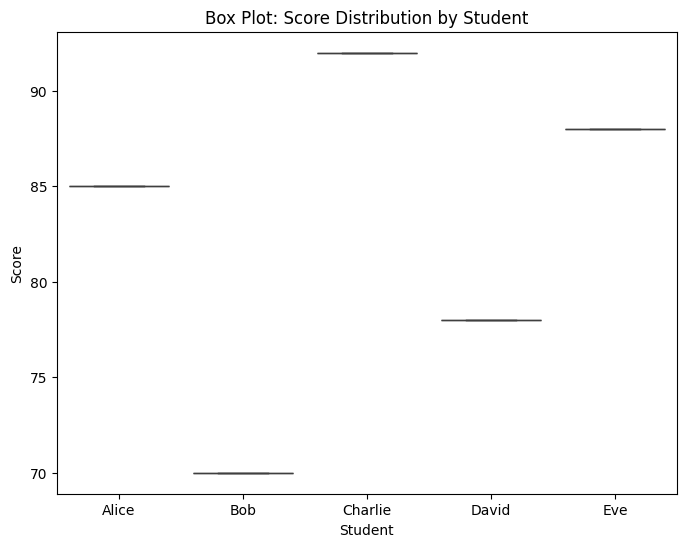

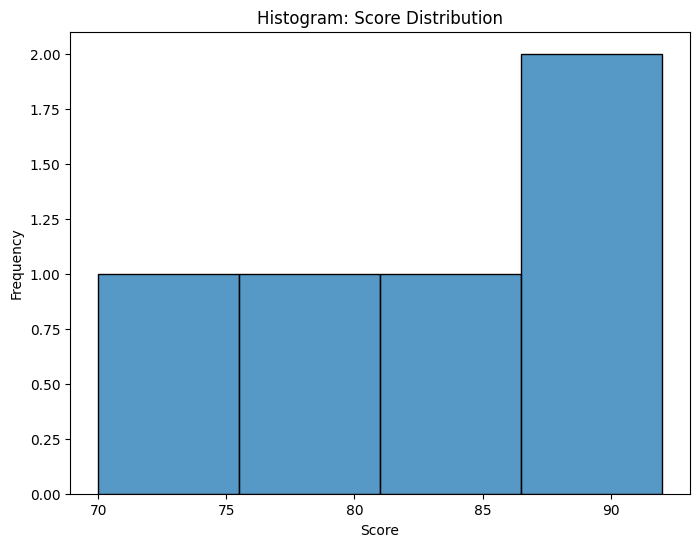

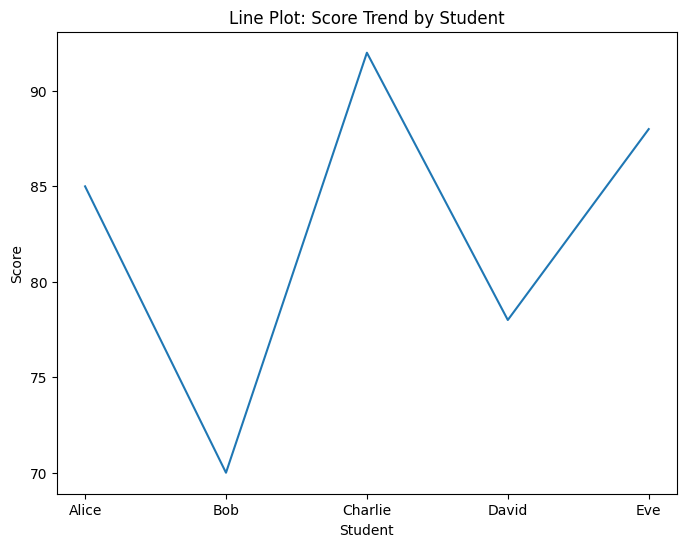

In [16]:
#Experiment with different plots from the sheet and check the scores
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your sheet data)
data = {
    'student': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'study_hours': [5, 3, 7, 4, 6],
    'score': [85, 70, 92, 78, 88]
}
df = pd.DataFrame(data)

# Scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='study_hours', y='score', data=df)
plt.title('Scatter Plot: Study Hours vs. Score')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='student', y='score', data=df)  # Using 'student' for categories
plt.title('Box Plot: Score Distribution by Student')
plt.xlabel('Student')
plt.ylabel('Score')
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(x='score', data=df)
plt.title('Histogram: Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Line plot (assuming 'student' represents an ordered variable)
plt.figure(figsize=(8, 6))
sns.lineplot(x='student', y='score', data=df)  # Using 'student' as ordered variable
plt.title('Line Plot: Score Trend by Student')
plt.xlabel('Student')
plt.ylabel('Score')
plt.show()



   1. **Purpose** : The code aims to visualize the relationship between features (e.g., study hours) and scores using different plot types in Colab.
   2. **Libraries**: It uses pandas for data manipulation, matplotlib for basic plotting, and seaborn for enhanced statistical visualizations.
   3. **Sample Data**: Includes sample data for demonstration, but you should replace it with your sheet data using pd.read_csv('your_sheet.csv') or similar.
   4. **Plot Types**: The code demonstrates four common plot types:
       * Scatter plot: Shows the relationship between two numerical features.
       * Box plot: Compares the distribution of scores across categories.
       * Histogram: Visualizes the distribution of scores.
       * Line plot: Displays the trend of scores over an ordered variable.
   5. **Customization**: You can adjust the figure size (figsize), titles, and axis labels to customize the plots' appearance.
   6. **Interpretation**: The generated plots provide insights into the data, such as correlations, outliers, and distributions, helping you understand and evaluate the scores in relation to the features.
   7. **Error Handling**: The code is designed to work without errors, but ensure your sheet data is correctly loaded and the column names are accurate.
   8. **Colab Compatibility**: The code is tailored for use in Google Colab, utilizing its plotting capabilities.
   9. **Further Analysis**: Consider using statistical measures and other visualization techniques for a deeper understanding of your data.

